<a href="https://colab.research.google.com/github/sakuronohana/my_datascience/blob/master/4_DS_Bootcamp_ML_Datenbeschaffung_Datenaufbereitung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS Bootcamp Teil 2 - Machine Learning - Datenbeschaffung & Datenaufbereitung #

## DS Bootcamp Verzeichnis ##

[**Teil 1 - Data Science - Prozesse & Grundlagen**](https://github.com/sakuronohana/my_datascience/blob/master/1_DS_Bootcamp_Prozesse_%26_Grundlagen.ipynb)

[**Teil 1a - Data Science - Python Basic & Advanced**](https://github.com/sakuronohana/my_datascience/blob/master/2_DS_Bootcamp_Python_Basic_%26_Advanced.ipynb)

[**Teil 1b - Data Science - R Basic & Advanced**](https://github.com/sakuronohana/my_datascience/blob/master/3_DS_Bootcamp_R_Basic_%26_Advanced.ipynb)

[**Teil 2 - Data Science - ML - Datenbeschaffung & Datenaufbereitung**](https://github.com/sakuronohana/my_datascience/blob/master/4_DS_Bootcamp_ML_Datenbeschaffung_Datenaufbereitung.ipynb)

[**Teil 3 - Data Science - ML - Modellwahl**](https://github.com/sakuronohana/my_datascience/blob/master/5_DS_Bootcamp_ML_Modellwahl.ipynb)

[**Teil 4 - Data Science - ML - Modell Training, Testing & Optimierung**](https://github.com/sakuronohana/my_datascience/blob/master/6_DS_Bootcamp_ML_Modell_Train_Test_Optimize.ipynb)

[**Teil 5 - Data Science - ML - Modell Produktivsetzung, Überwachung & Pflege**](https://github.com/sakuronohana/my_datascience/blob/master/7_DS_Bootcamp_ML_Modell_Deploy_Monitor_Maintain.ipynb)

##Datenbeschaffung (Research/Data Gathering)##

Die Beschaffung der richtigen Daten zur Erreichung des gesetzten Zieles stellt sich oft als schwieriger heraus als gedacht. Einen Datensatz in der richtigen Qualität und Quantität zu finden ist oft eine Herausforderung. Mit viel Glück bestehen im eigenen Unternehmen grossen Datenmengen die genutzt werden können. Oft müssen diese jedoch noch zusätzlich mit externen Daten angereichert werden.

###Datensatzsuche im Internet###

Nachfolgend werden ein paar wertvolle Quellen für den Bezug von Datensätzen aufgelistet. Die meisten dieser Datenquellen sind frei zugänglich:

*  Google Dataset Search - Ist eine von Google optimierte Engine für die Suche von Datensätzen [Link](https://toolbox.google.com/datasetsearch)
*  Google Dataset Selection [Link](https://ai.google/tools/datasets/)
*  Google TensorFlow Datasets - Mit dem Module tensorflow_dataset können verschieden Datensätze für das Testen von ML Modellen angezogen werden [Link](https://www.tensorflow.org/datasets/catalog/overview) 
*  Kaggle Datasets - Die grosse DS Competition Platform Kaggle verfügt über eine Vielzahl von guten Datensätzen [Link](https://www.kaggle.com/datasets)
*  U.S. Government’s open data - Datenbank mit ein Vielzahl von Datensätzen ermittelt durch die U.S Regierung [Link](https://www.data.gov/)
*  Swiss Open Government Data - Datensätze der Schweizer Regierung [Link](https://opendata.swiss/de/)
*  European Bioinformatics Institute - Enthält eine Vielzahl von Daten aus dem Domains Biologie und Chemie [Link](https://www.ebi.ac.uk/services)
* Cool Datasets - Sammlung von Datensatzquellen [Link](https://www.cooldatasets.com/)
*  Wikipedia List of Datasets - Wikipedia Seite mit einer Vielzahl von Links zu Datensätzen [Link](https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research)

Neben den oben gelisteten Datensätze gibt es noch eine Menge mehr. Am besten jeweils mit folgenden Suchbegriffen in Google suchen:

    open dataset for "Thema"


###Bilder selber herstellen###

Neben den unzähligen Datensets welche sich im Internet finden lassen, gibt es auch andere Möglichkeiten Bilder für die das Trainieren eines Klassifikators zu erstellen.

***Bilder mit Fotokamera erstellen***

Diese Methode gehört wohl zur mühsamsten Art um Bilder selber herzustellen, da es für das Training eines Klassifikators tausende von Bildern braucht.

***Bilder aus Video extrahieren***

Ein guter Trick um in einer kurzen Zeit zu vielen Bildern zu gelangen ist ein Video eines Gegenstands zu drehen. Die einzelnen Bilder lassen sich dann mit dem Tool ffmpeg aus dem Video extrahieren:

   *ffmpeg -i schale.mp4 schale%03d.jpg*



###Scraping (Sammeln) von Google Images###

Google verfügt mittlerweilen über eine riesige Datenbank von Bildern, welche sich natürlich gut für das Training von Klassifikatoren (Neuronale Netzwerke)eignet.

Nachfolgend kurz eine kleines Python-Script für die Sammlung von verschiedenen Bildern

In [0]:
# importing google_images_download module
from google_images_download import google_images_download

# creating object 
response = google_images_download.googleimagesdownload()

search_queries = ['Dogs', 
                  'Cats',]
  
def downloadimages(query): 
    # keywords is the search query 
    # format is the image file format 
    # limit is the number of images to be downloaded 
    # print urs is to print the image file url 
    # size is the image size which can 
    # be specified manually ("large, medium, icon") 
    # aspect ratio denotes the height width ratio 
    # of images to download. ("tall, square, wide, panoramic") 
    arguments = {"keywords": query, 
                 "format": "jpg", 
                 "limit":4, 
                 "print_urls":True, 
                 "size": "medium"} 
    try: 
        response.download(arguments) 
      
    # Handling File NotFound Error     
    except FileNotFoundError:  
        arguments = {"keywords": query, 
                     "format": "jpg", 
                     "limit":4, 
                     "print_urls":True,  
                     "size": "medium"} 
                       
        # Providing arguments for the searched query 
        try: 
            # Downloading the photos based 
            # on the given arguments 
            response.download(arguments)  
        except: 
            pass
  
# Driver Code 
for query in search_queries: 
    downloadimages(query)  
    print()  

### Extraktion von Informationen (Daten) aus XML/HTML ###

Daten lassen sich auch direkt aus XML oder HTML Inhalten auslesen. Zu diesem Zweck gibt es eine Python Bibliothek namens "Beautiful Soup" [Link](https://www.crummy.com/software/BeautifulSoup/bs4/doc/). Nachfolgend ein kleines Python Beispiel:

[Link zum Tutorial](https://www.dataquest.io/blog/web-scraping-tutorial-python/)

Ein ***Parser*** [ˈpɑːʁzɐ] (engl. to parse, „analysieren“, bzw. lateinisch pars, „Teil“; im Deutschen gelegentlich auch Zerteiler) ist ein Computerprogramm, das in der Informatik für die Zerlegung und Umwandlung einer Eingabe in ein für die Weiterverarbeitung geeigneteres Format zuständig ist.

In [0]:
''' Installation der Python Bibliothek. Hinweis: Auf Google Colab ist die Bibliothenk bereits installiert ''' 

!pip install beautifulsoup4

''' Installation des XML Parser'''
!pip install lxml

''' Installation dex HMLM Parser '''
!pip install html5lib

In [0]:
# Nun können wir das entsprechenden Modul laden bzw. importieren
import pandas as pd
from bs4 import BeautifulSoup

# Die request Bibliothek ermöglicht es uns mittels GET request ein HTML von einem Webserver herunterzuladen, da dies BS4 nicht kann.
import requests as rq  

In [0]:
# Nun werden wir mit Hilfe von Reqiest eine Webseite herunterladen

url = 'http://dataquestio.github.io/web-scraping-pages/simple.html'
page = rq.get(url)
page.status_code

# Ist der Status Code 200, dann hat der Download funktioniert. Fängt der 
# Code mit 4 oder 5 an, dann besteht ein Error

200

In [0]:
# Nun lassen wir uns mal den geladenen Inhalt anschauen

page.content

b'<!DOCTYPE html>\n<html>\n    <head>\n        <title>A simple example page</title>\n    </head>\n    <body>\n        <p>Here is some simple content for this page.</p>\n    </body>\n</html>'

In [0]:
# Nun könnnen wir das heruntergeladene HTML Dokument parsern (analysieren)
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   A simple example page
  </title>
 </head>
 <body>
  <p>
   Here is some simple content for this page.
  </p>
 </body>
</html>


In [0]:
list(soup.children)

['html', '\n', <html>
 <head>
 <title>A simple example page</title>
 </head>
 <body>
 <p>Here is some simple content for this page.</p>
 </body>
 </html>]

In [0]:
[type(item) for item in list(soup.children)]

[bs4.element.Doctype, bs4.element.NavigableString, bs4.element.Tag]

###Datenformate###

Daten können beispielsweise direkt aus Datenbanken (Rationale DB, Polystrukturierte DB usw.) oder mittels Dateien extrahiert werden. Während man im Unternehmen selbst oft auf Datenbanken wie das Data Warehouse (DWH oder IWH) usw. mittels SQL zugreifen und Daten daraus extrahieren kann, sind im Internet verschiedene Dateiformate im Umlauf. Welches Format am Besten ist, ist oft eine philosophische Angelegenheit. Es gibt aber teilweise Unterschiede im Bezug auf die Performance beim Import (bspw. CSVs werden viel schneller geladen als XLSX) Nachfolgend die wichtigsten bzw. beliebtesten Formate (siehe detailierte Beschreibung ([Link](https://towardsdatascience.com/guide-to-file-formats-for-machine-learning-columnar-training-inferencing-and-the-feature-store-2e0c3d18d4f9)):

* Columnar Data File Formats (Database-Files)
  * .parquet
  * .orc
  * .petastorm
* Tabular Text-based File Formats
  * .csv
  * .xlsx
* Nested File Formats
  * .tfrecords
  * .json
  * .xml
  * .avro
* Array-Based Formats
  * .npy
* Hierarchical Data Formats
 * .h5
 * .hdf5
 * .nc
* Model File Formats
 * .pb
 * .onnx
 * .pkl
 * .mlmodel
 * .zip
 * .pmml
 * .pt

 Nachfolgend die verwendeten Datenformat noch nach Einsatzzweck:
 <img src="https://miro.medium.com/max/715/0*H7CB1kGuukCv2rcK.png" alt="Drawing" width = "500"/>
  <img src="https://miro.medium.com/max/626/0*0MZyp6CdafGNrnUr.png" alt="Drawing" width = "500"/>
  <img src="https://miro.medium.com/max/713/0*phrNmrrcyoX-lnIE.png" alt="Drawing" width = "500"/>



##Datenaufbereitung (Data Pre-Processing)##

Beim Data Pre-Processing, geht es im Wesentlichen darum, die Daten für das ML-Modell nutzbar zu machen. Was sich hier so einfach anhört ist in der Praxis ein relativ aufwendiger Prozess und benötigt nebst der Datenbeschaffung das grösste Zeitbudget. Das DPP besteht aus folgenden nicht abschliessenden Aktivitäten:

* **Datenbereinigung**. Entfernen oder Korrigieren von Datensätzen mit beschädigten oder ungültigen Werten aus Rohdaten sowie Entfernen von Datensätzen, bei denen eine große Zahl von Spalten fehlt
* **Instanzauswahl und Partitionierung**. Auswählen von Datenpunkten aus dem Eingabe-Dataset zum Erstellen von Trainings-, Evaluations- (Validierungs-) und Testdaten. Dieser Prozess umfasst Verfahren für wiederholbare, zufällige Stichproben, die Überabtastung von "Minderheitsklassen" und geschichtete Partitionierung.
* **Abstimmung von Merkmalen**. Verbessern der Qualität eines Merkmals für ML, einschließlich der Skalierung und Normalisierung numerischer Werte, der Eingabe fehlender Werte, des Ausklammerns von Ausreißern und der Anpassung von Werten mit asymmetrischen Verteilungen
* **Darstellungstransformation**. Umwandeln eines numerischen Merkmals in ein kategoriales Merkmal (durch "Bucketization") und Umwandeln kategorialer Merkmale in eine numerische Darstellung (durch One-Hot-Codierung, Lernen mit Anzahlen, Einbetten von Merkmalen mit geringer Dichte usw.). Einige Modelle funktionieren nur mit numerischen oder kategorialen Merkmalen, andere können gemischte Merkmale verarbeiten. Auch wenn Modelle beide Typen verarbeiten können, können sie von einer unterschiedlichen Darstellung (numerisch und kategorial) desselben Merkmals profitieren.
* **Extraktion von Merkmalen**. Reduzieren der Anzahl von Merkmalen durch das Erstellen von Datendarstellungen mit weniger Dimensionen und höherer Leistungsfähigkeit. Dabei werden Verfahren wie PCA, das Extrahieren von Einbettungen und Hashen eingesetzt.
* **Auswahl von Merkmalen**. Auswählen einer Teilmenge der Eingabemerkmale zum Trainieren des Modells und Ignorieren irrelevanter oder redundanter Merkmale mithilfe von Filter- oder Wrapper-Methoden. Das kann auch einfaches Löschen von Merkmalen beinhalten, wenn bei den Merkmalen eine große Zahl von Werten fehlt
* **Erstellung von Merkmalen**. Erstellen neuer Merkmale, entweder mithilfe typischer Methoden wie Polynom-Erweiterung (Distributiv-/Verteilungsgesetze) – durch Verwendung univariater mathematischer Funktionen – oder durch Feature Crossing (zum Erfassen von Merkmalsinteraktionen). Merkmale können auch mithilfe von Geschäftslogik aus dem Fachbereich des ML-Anwendungsfalls erstellt werden.



###Datensatzanalyse### 







Meist visuelle Erkundung der Art und Struktur des Datensatzes. Oft wird in dieser Phase folgende Punkte ermittelt:
  * Datentyp (nummerische oder kategorische Werte)
  * Datensatzwerte (oft pro Feature):
    * Anzahl Datensätze (Count)
    * Anzahl fehlende Werte (Missing)
    * Arihmetischer Mittelwert (Mean) -> nur nummerischen Features
    * Zentralwert (Median)
    * Häufigster Wert (Modus)
    * Standardabweichung (Standard Deviation) zeigt Streuung der Werte bzw. wie
      durchschnittliche Entfernung zum Mittelwert.
    * Null-Werte (Zeros)
    * Kleinster Wert (Min)
    * Grösster Wert (Max)
    * Anzahl einmaliger Werte (Uniques)
    * Perzentil auch Quartil (1.Quartil = 25%, 2.Quartil = 50%    3.Quartil =    75%) besagt, dass ein bestimmter prozentualer Anteil der Beobachtungen unterhalb eines Wertes liegt. Beispiel 25% = 18 bedeutet, dass 25% der Werte unter 18 liegen. 2. Quartil bzw. 50% deckt sich immer mit dem arithmetischen Mittelwert.


####Tools####

Für die Datensatzanalyse bzw. Erkundung der Daten bestehen verschiedene Methoden und Tools. Nachfolgenden werden ein paar mögliche Toosl und Methoden vorgestellt:

#####**Python**#####

In erster Line kann eine Datensatzanalyse mittels den Boardmittel von Python gemacht werden. Nachfolgend die wichtigsten Befehlen zur Sichtung der Datenstruktur

In [6]:
import pandas as pd

datloc = 'https://raw.githubusercontent.com/sakuronohana/my_datascience/master/datasets/new_strada2_data_2738408.csv'
datload = pd.read_csv(datloc)
datload.head()

,Unnamed: 0,Unnamed: 0.1,BFS_NR,GEBIET_NAME,THEMA_NAME,SET_NAME,SUBSET_NAME,INDIKATOR_ID,INDIKATOR_NAME,INDIKATOR_JAHR,INDIKATOR_VALUE,EINHEIT_KURZ,EINHEIT_LANG,Unnamed: 11
0,0,NaN,3251,Altstätten,Energie,Gasverbrauch,NaN,570,Gasverbrauch Total [MWh],2013,32838.0,MWh,Megawattstunden,NaN
1,1,1.0,3251,Altstätten,Energie,Gasverbrauch,NaN,570,Gasverbrauch Total [MWh],2014,26909.0,MWh,Megawattstunden,NaN
2,2,2.0,3251,Altstätten,Energie,Gasverbrauch,NaN,570,Gasverbrauch Total [MWh],2015,27777.0,MWh,Megawattstunden,NaN
3,3,3.0,3251,Altstätten,Energie,Gasverbrauch,NaN,570,Gasverbrauch Total [MWh],2016,27936.0,MWh,Megawattstunden,NaN
4,4,4.0,3251,Altstätten,Energie,Gasverbrauch,NaN,570,Gasverbrauch Total [MWh],2017,30093.0,MWh,Megawattstunden,NaN


In [0]:
datanaly = datload.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 11'], axis=1)

In [11]:
''' Mit der Methode info() lässt sich ein kurze Beschreibung pro Merkmal inkl. Anzahl Zeilen, Anzahl Wert ungleich Null, Datentyp und Speichernutzung darstellen '''

datanaly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 11 columns):
BFS_NR             56 non-null int64
GEBIET_NAME        56 non-null object
THEMA_NAME         56 non-null object
SET_NAME           56 non-null object
SUBSET_NAME        0 non-null float64
INDIKATOR_ID       56 non-null int64
INDIKATOR_NAME     56 non-null object
INDIKATOR_JAHR     56 non-null int64
INDIKATOR_VALUE    55 non-null float64
EINHEIT_KURZ       56 non-null object
EINHEIT_LANG       56 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 4.9+ KB


**Hinweis**: In der Datensatzinformation sehen wir beispielsweise, dass das Feature SUBSET_NAME keine Wert bzw. nur die Werte NaN enthalten. Wir können somit dieses Feature ignorieren bzw. löschen.

In [0]:
datanaly = datanaly.drop('SUBSET_NAME', axis=1)

In [20]:
''' Mit describe() ermitteln wir die wichtigsten Werte pro nummerisches Merkmal (ohne objects)
siehe Erklärung oben 
'''

datanaly.describe()

,BFS_NR,INDIKATOR_ID,INDIKATOR_JAHR,INDIKATOR_VALUE
count,56.0,56.000000,56.000000,55.000000
mean,3251.0,575.250000,2015.142857,17690.158182
std,0.0,3.444363,1.367527,22151.306149
min,3251.0,570.000000,2013.000000,3.700000
25%,3251.0,572.000000,2014.000000,47.500000
50%,3251.0,575.000000,2015.000000,3716.000000
75%,3251.0,578.000000,2016.000000,30401.000000
max,3251.0,581.000000,2017.000000,77874.000000


**Hinweis**: Die Datensatzbeschreibungen sollte jeweils mit Vorsicht bedacht werden. So verbirgt sich hinter dem Wert INDIKATOR_VALUE in diesem Datensatz sowohl die Anzahl verbrachtes Gas wie auch Strom. Es lohnt gerade in diesem Fall zusätzlich noch eine Gruppierung vorzunehmen damit die Beschreibung noch etwas klarer wird.
Weiter können wir in der Beschreibung sehen, dass das Feature BFS_NR überall den gleichen Wert anzeigt, was daraufhin deutet, dass es nur diesen einen Wert gibt. Wir können somit dieses Feature auch ausschliessen.

In [29]:
datanaly = datanaly.drop('BFS_NR', axis=1)

datanaly.groupby('INDIKATOR_NAME').describe()

INDIKATOR_ID  ... INDIKATOR_VALUE
                                                     count  ...             max
INDIKATOR_NAME                                              ...                
Gasverbrauch Gewerbe [MWh]                             5.0  ...          7238.0
Gasverbrauch Haushalte [MWh]                           5.0  ...         26235.0
Gasverbrauch Industrie [MWh]                           5.0  ...           873.0
Gasverbrauch Total [MWh]                               5.0  ...         32838.0
Stromverbrauch Grossverbraucher [%]                    4.0  ...            50.8
Stromverbrauch Grossverbraucher [MWh]                  4.0  ...         37795.0
Stromverbrauch Kleinverbraucher [%]                    5.0  ...            48.6
Stromverbrauch Kleinverbraucher [MWh]                  5.0  ...         37367.0
Stromverbrauch Total [MWh/Energienutzer]               5.0  ...             4.5
Stromverbrauch Total [MWh]                             5.0  ...         77874.0
Stromverbrauch mittelgrosse Verbraucher [%]            4.0  ...             9.3
Stromverbrauch mittelgrosse Verbraucher [MWh]          4.0  ...          6643.0

[12 rows x 24 columns]

Eine weitere gute Möglichkeit das Wertverhälnis in einem Datensatz visuell darzustellen ist das Histogramm. Das **Histogramm** zeigt die Anzahl Datenpunkte auf der vertikalen Achse (Y) die in einem bestimmen Wertebereich auf der horizontalen Achse (X) liegen.

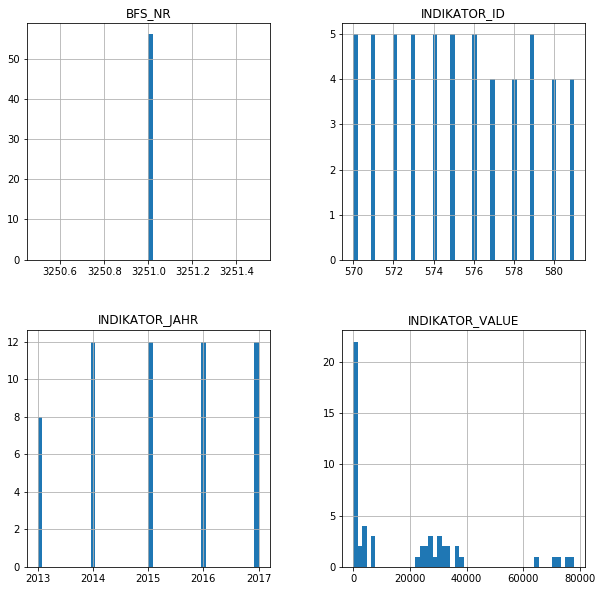

In [28]:
# Für die Darstellung des Histogramm Plots benötigen wir die Matplotlib Library.
# so lässt sich das Histogramm im Jupyter Notebook darstellen

%matplotlib inline 
import matplotlib.pyplot as plt

datanaly.hist (bins=50, figsize=(10,10))
plt.show()

#####**Facets**#####

Eines meiner absoluten Lieblingstools ist das von Google zur Verfügung gestellte Tool **Facets** ([Link](https://pair-code.github.io/facets/)) an. Mittels Facets lassen sich die Daten aus mehreren Sichten betrachte.

OVERVIEW

Mit der Übersicht (engl. Overview) werden Feature-Daten aus einer beliebigen Anzahl von Datensätzen abgerufen, Feature für Feature analysiert und die Analyse visualisiert.
Die Übersicht bietet Benutzern ein schnelles Verständnis der Werteverteilung über die Features ihrer Datenmenge. Es lassen sich damit ungewöhnliche und häufige Probleme wie unerwartete Merkmalswerte, fehlende Merkmalswerte für eine große Anzahl von Beobachtungen, mögliche Verzerrungen beim Trainieren / Testen / Validieren etc. endecken.

 <img src="https://3.bp.blogspot.com/-lkb4w1DrJ-A/WWzzyPC428I/AAAAAAAAB48/TrSFgqxaYPY-jMv0cmXJaskUz9ImyXxLwCLcBGAs/s1600/image3.png" alt="Drawing" width = "800"/>
  
DIVE

Dive bietet eine interaktive Oberfläche zum Erkunden der Beziehung zwischen Datenpunkten für alle verschiedenen Funktionen eines Datensatzes. Jedes einzelne Element in der Visualisierung repräsentiert einen Datenpunkt. Positionieren Sie Elemente, indem Sie sie anhand ihrer Feature-Werte "facettieren" oder in mehrere Dimensionen unterteilen. Zu den Erfolgsgeschichten von Dive gehören das Erkennen von Klassifikatorfehlern, das Erkennen systematischer Fehler, das Bewerten der Grundwahrheit und potenzielle neue Signale für die Rangfolge.

 <img src="https://raw.githubusercontent.com/PAIR-code/facets/master/img/dive-census.png" alt="Drawing" width = "800"/>

 Es gibt grundsätzlich zwei Arten um Facets zu nutzen. Einerseits können Daten direkt auf das Facets [Portal](https://pair-code.github.io/facets/)) geladen werden. Hier gilt natürlich zu beachten, dass es wohl nicht wirklich sinnvoll ist beispielsweise vertrauliche Unternehmensdaten auf das Portal zu laden. Die zweite Möglichkeit ist es Facets in einem Jupyter Notebook einzubinden. Nachfolgenden möchte ich diese Möglichkeit genauer aufzeigen.


***Anwendung Facets in Jupyter Notebook***

Auf dem folgenden Link ist eine detailierte Installationsanleitung zu finden [Link](https://github.com/PAIR-code/facets)

In [0]:
# Facets Komponenten installieren

!pip install facets-overview

In [0]:
import pandas as pd

datloc = 'https://raw.githubusercontent.com/sakuronohana/my_datascience/master/datasets/new_strada2_data_2738408.csv'

datimp = pd.read_csv(datloc)


In [0]:
# Create the feature stats for the datasets and stringify it.
import base64
from facets_overview.generic_feature_statistics_generator import GenericFeatureStatisticsGenerator

gfsg = GenericFeatureStatisticsGenerator()
proto = gfsg.ProtoFromDataFrames([{'name': 'train', 'table': datimp}])
protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8")

In [0]:
# Display the facets overview visualization for this data
from IPython.core.display import display, HTML

HTML_TEMPLATE = """
        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html" >
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

In [0]:
# Die Daten können nun in Dive wie folgt visualisiert werden.
from IPython.core.display import display, HTML

jsonstr = datimp.to_json(orient='records')
HTML_TEMPLATE = """
        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""
html = HTML_TEMPLATE.format(jsonstr=jsonstr)
display(HTML(html))

###Extract, Transfer and Load (ETL)###

Im nachfolgenden Beispiel werden werden wir folgende Schritte ausführen:

1.   Verschiedene Datensätze aus CSV's laden
2.   Die Datensätze vergleichen
3.   Features aus verschiedenen Datensätzen zusammenführen
4.   Die Zusammengeführten Datensätze wieder in ein CSV exportieren.



In [0]:
#Zwei Datensätze laden#

import pandas as pd
import numpy as np
import datetime

daturl = 'https://raw.githubusercontent.com/sakuronohana/my_datascience/master/plane_crash_data.csv'

dimport1 = pd.DataFrame(pd.read_csv(daturl))
dimport2 = pd.DataFrame(pd.read_csv(daturl))


In [0]:
# Datensätze vergleichen #

# Datentypen und Features prüfen
# dimport1.info()
# dimport2.info()

# Datentypen wie Datum und Zeit anpassen
dimport1['date'] = pd.to_datetime(dimport1['date']).dt.strftime('%d.%m.%Y')

# Bestimmte Werte ersetzen
dimport1 = dimport1.replace(to_replace='?', value ='')

# Bestimmter Wert in Spalte suchen
dimport1[dimport1['time'].str.contains('c', na=False)]# mit na=False werden NAN Werte ignoriert
#dimport1[dimport1['time'].str.replace('c','')]

         
#dimport1['time'] = pd.Timestamp(dimport1['time']).time('%m:%h')